# Neuronal Network

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import fetch_openml

sns.set()

## Inspect Data

In [40]:
original_data = pd.read_csv("df.csv")
original_data.head()

,commit,author,date,message,diffLength,isBugfix,isBuggy,path,pathType,tagIndex,...,countStatic,countThis,countThrow,countVar,countAbstract,countGoto,countInclude,countPrint,countRequire,countYield
0,4f7ddab23962a62c1bf2c8883d734e3b61aa965b,anonym,Tue Nov 3 14:13:59 2020 +0100,Bugfix: fixed issue where users without full C...,545.0,1.0,0,php/base/module/detail/DynamicFormActionModule...,.php,564.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9e12609d756fb3718e6ef23e859e4bfa89266f0c,anonym,Tue Nov 3 10:50:51 2020 +0100,ENHANCEMENT - CiBrowserOverview - schema switc...,1658.0,0.0,0,resources/js/base/CiBrowser/CiBrowserOverview.js,.js,726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4d4a292da7cbac135492260fa467e17a9a04de51,anonym,Tue Nov 3 10:50:19 2020 +0100,BUGFIX - DynamicForm - ActionController - remo...,922.0,1.0,0,resources/js/base/BaseView/FormView/DynamicFor...,.js,725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b51799cca9b75b69bd5e25ca5fe3cecd3658eb22,anonym,Tue Nov 3 09:40:36 2020 +0100,BUGFIX - messageCatalog - hardened code,561.0,1.0,0,resources/js/base/helper/MessageCatalog.js,.js,725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9064f0108f758a13cbf334f11d0fbc376e3e4052,anonym,Tue Nov 3 09:37:22 2020 +0100,ENHANCEMENT - ItemType - added schema switch,1493.0,0.0,0,php/base/service/overview/ItemTypePermissionOv...,.php,725.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
original_data.isnull().sum()

commit              0
author              0
date                0
message             0
diffLength         73
isBugfix            0
isBuggy             0
path               73
pathType          955
tagIndex            0
countArguments      0
countAwait          0
countBreak          0
countCatch          0
countDebugger       0
countElse           0
countEnum           0
countExport         0
countExtends        0
countFor            0
countFunctions      0
countIfs            0
countImport         0
countInterface      0
countLet            0
countNew            0
countPrivate        0
countProtected      0
countPublic         0
countReturn         0
countStatic         0
countThis           0
countThrow          0
countVar            0
countAbstract       0
countGoto           0
countInclude        0
countPrint          0
countRequire        0
countYield          0
dtype: int64

In [42]:
# Delete rows with no path
original_data.dropna(subset = ["path"], inplace=True)
# Fill NULL Values with 0
original_data.fillna(0, inplace=True)

In [43]:
original_data.isnull().sum()

commit            0
author            0
date              0
message           0
diffLength        0
isBugfix          0
isBuggy           0
path              0
pathType          0
tagIndex          0
countArguments    0
countAwait        0
countBreak        0
countCatch        0
countDebugger     0
countElse         0
countEnum         0
countExport       0
countExtends      0
countFor          0
countFunctions    0
countIfs          0
countImport       0
countInterface    0
countLet          0
countNew          0
countPrivate      0
countProtected    0
countPublic       0
countReturn       0
countStatic       0
countThis         0
countThrow        0
countVar          0
countAbstract     0
countGoto         0
countInclude      0
countPrint        0
countRequire      0
countYield        0
dtype: int64

In [44]:
original_data.describe()

,diffLength,isBugfix,isBuggy,tagIndex,countArguments,countAwait,countBreak,countCatch,countDebugger,countElse,...,countStatic,countThis,countThrow,countVar,countAbstract,countGoto,countInclude,countPrint,countRequire,countYield
count,8.725000e+03,8725.000000,8725.000000,8725.000000,8725.000000,8725.0,8725.000000,8725.000000,8725.0,8725.000000,...,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000
mean,9.244751e+03,0.372264,0.010086,213.875645,0.010544,0.0,0.083095,0.011117,0.0,0.251117,...,0.013639,2.372722,0.030946,0.460172,0.010430,0.000917,0.040573,0.021662,0.131003,0.001719
std,1.829580e+05,0.483436,0.099927,254.972755,0.363549,0.0,2.080806,0.333778,0.0,4.667716,...,0.299276,42.488515,1.191713,10.678771,0.533178,0.062422,0.960692,0.588841,2.009528,0.092704
min,1.330000e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.770000e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.115000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.521000e+03,1.000000,0.000000,427.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.079163e+07,1.000000,1.000000,726.000000,20.000000,0.0,146.000000,25.000000,0.0,259.000000,...,12.000000,2259.000000,81.000000,662.000000,33.000000,5.000000,41.000000,35.000000,114.000000,6.000000


In [45]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8725 entries, 0 to 8797
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   commit          8725 non-null   object 
 1   author          8725 non-null   object 
 2   date            8725 non-null   object 
 3   message         8725 non-null   object 
 4   diffLength      8725 non-null   float64
 5   isBugfix        8725 non-null   float64
 6   isBuggy         8725 non-null   int64  
 7   path            8725 non-null   object 
 8   pathType        8725 non-null   object 
 9   tagIndex        8725 non-null   float64
 10  countArguments  8725 non-null   float64
 11  countAwait      8725 non-null   float64
 12  countBreak      8725 non-null   float64
 13  countCatch      8725 non-null   float64
 14  countDebugger   8725 non-null   float64
 15  countElse       8725 non-null   float64
 16  countEnum       8725 non-null   float64
 17  countExport     8725 non-null   f

array([[<AxesSubplot:title={'center':'diffLength'}>,
        <AxesSubplot:title={'center':'isBugfix'}>,
        <AxesSubplot:title={'center':'isBuggy'}>,
        <AxesSubplot:title={'center':'tagIndex'}>,
        <AxesSubplot:title={'center':'countArguments'}>,
        <AxesSubplot:title={'center':'countAwait'}>],
       [<AxesSubplot:title={'center':'countBreak'}>,
        <AxesSubplot:title={'center':'countCatch'}>,
        <AxesSubplot:title={'center':'countDebugger'}>,
        <AxesSubplot:title={'center':'countElse'}>,
        <AxesSubplot:title={'center':'countEnum'}>,
        <AxesSubplot:title={'center':'countExport'}>],
       [<AxesSubplot:title={'center':'countExtends'}>,
        <AxesSubplot:title={'center':'countFor'}>,
        <AxesSubplot:title={'center':'countFunctions'}>,
        <AxesSubplot:title={'center':'countIfs'}>,
        <AxesSubplot:title={'center':'countImport'}>,
        <AxesSubplot:title={'center':'countInterface'}>],
       [<AxesSubplot:title={'center':

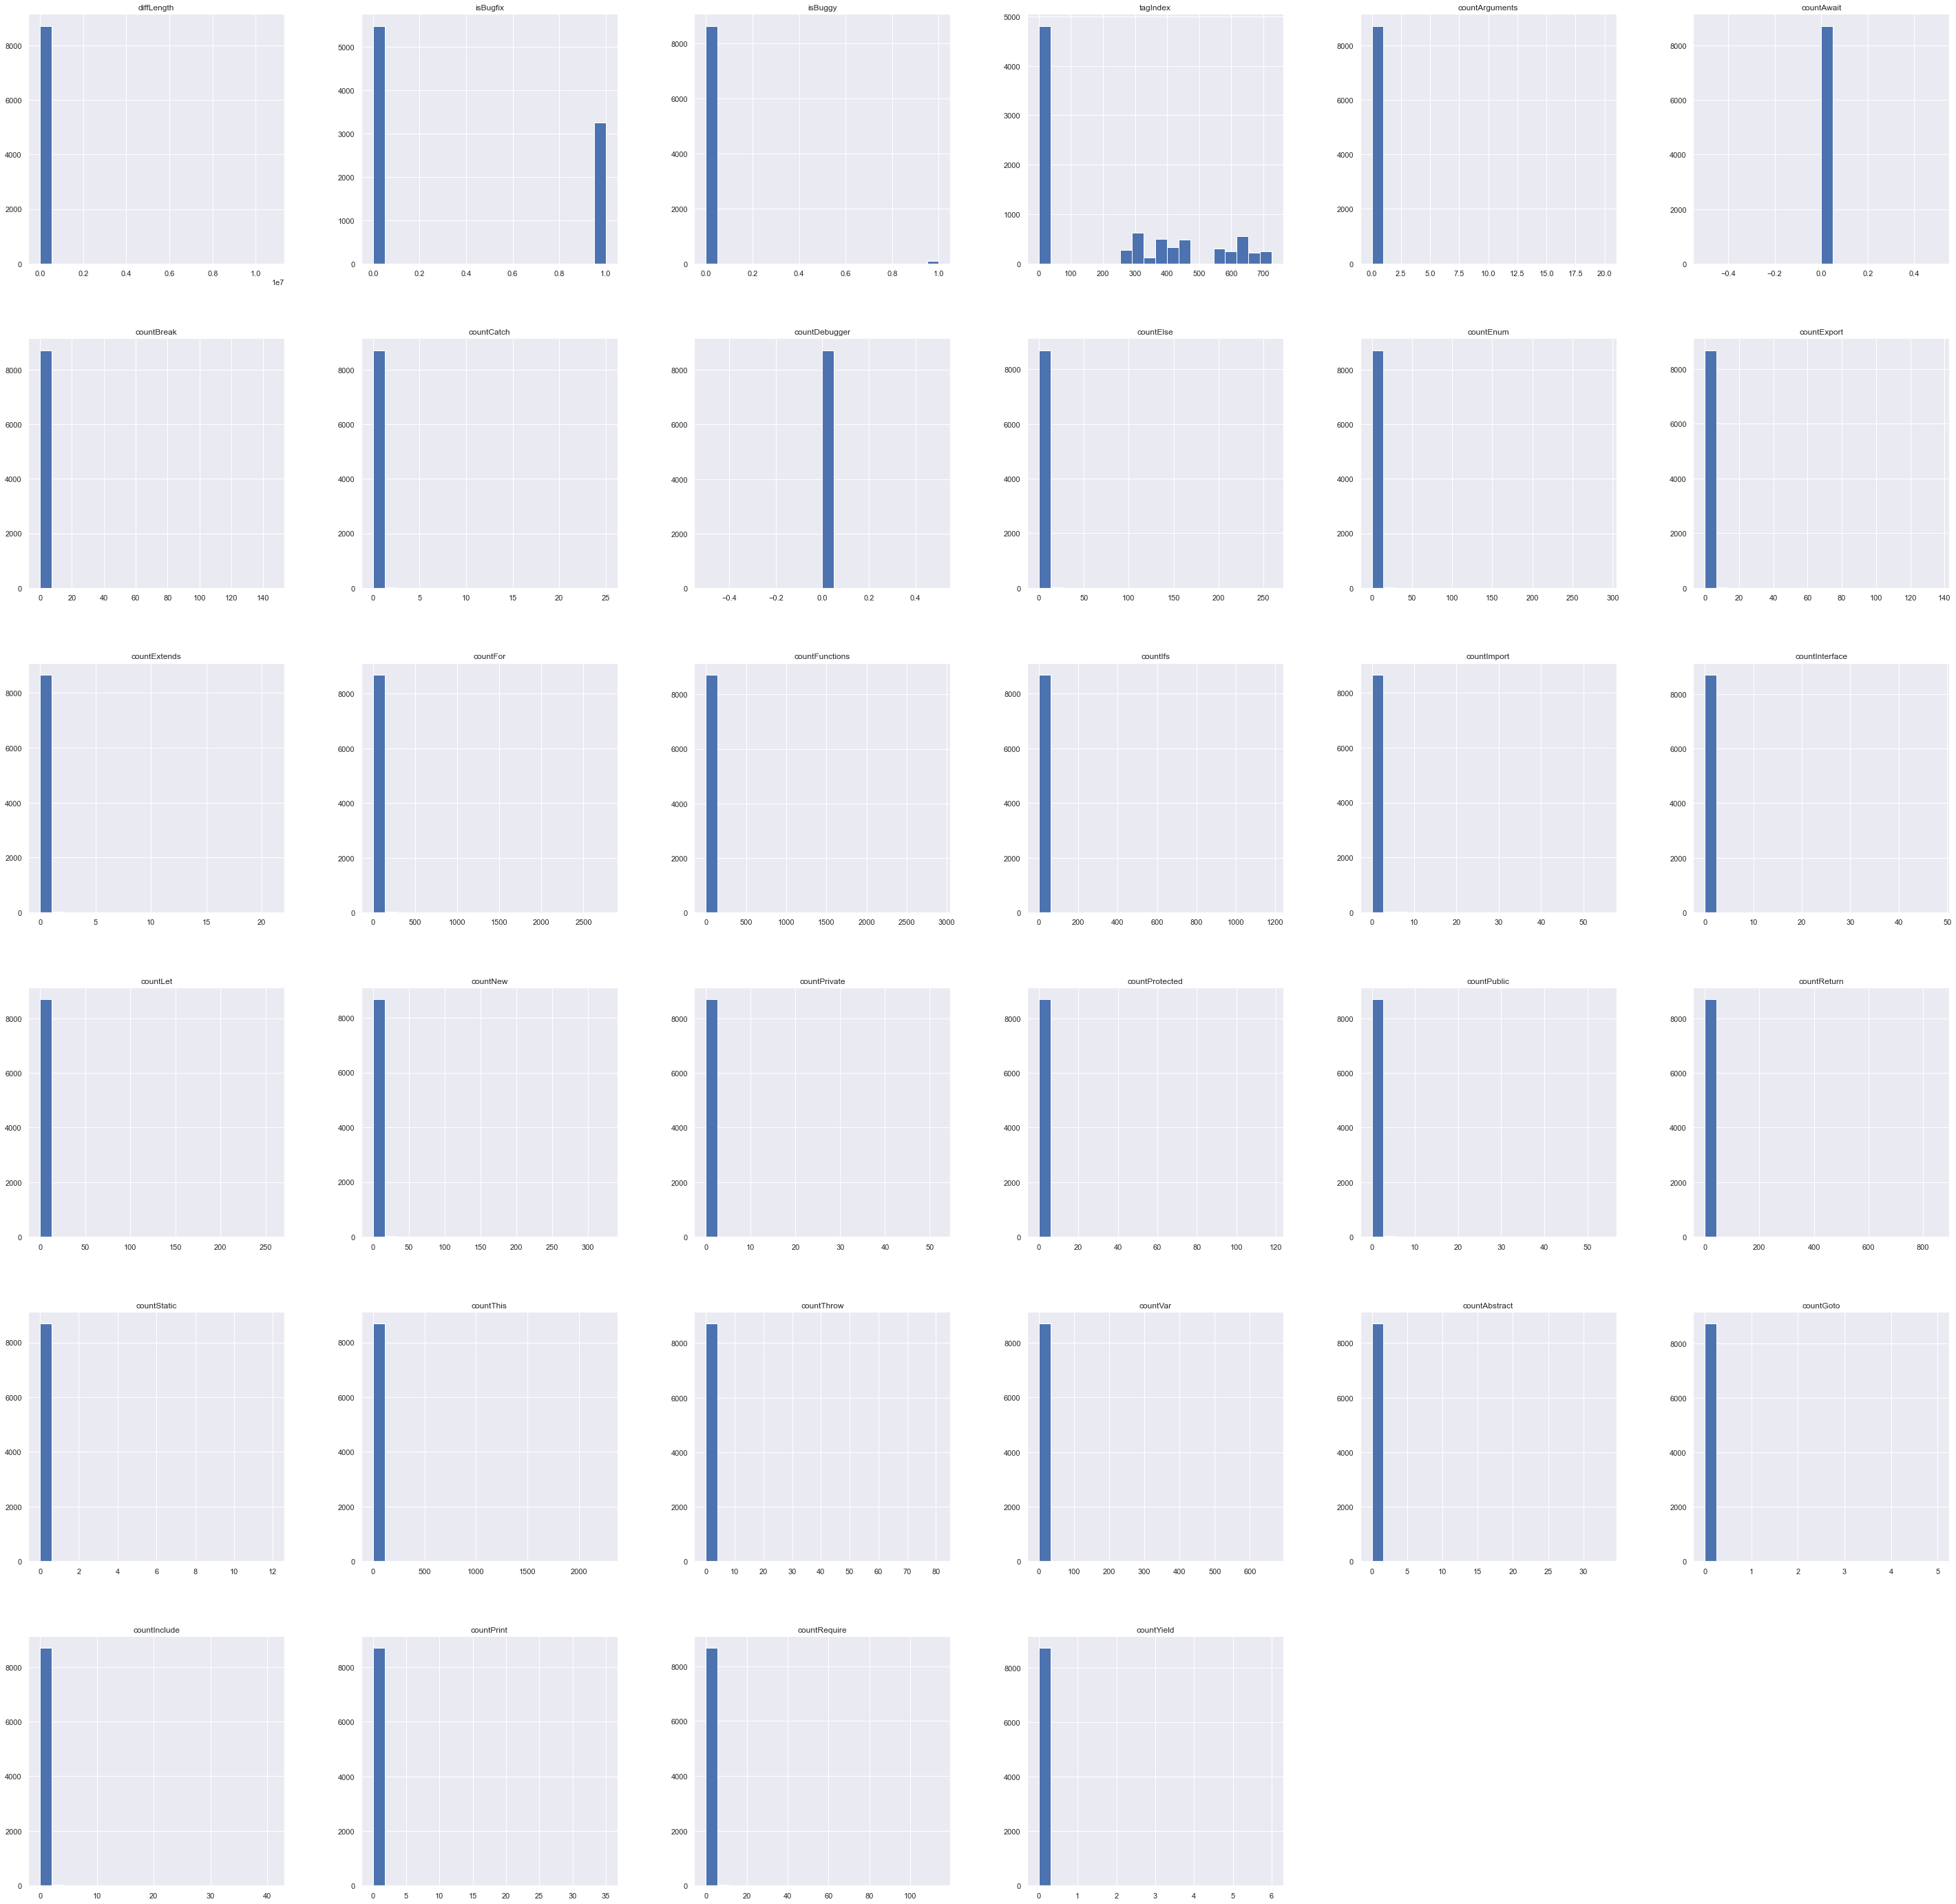

In [46]:
# inspect histogramms to find outliers
original_data.hist(figsize=(50,50), bins=20)

### create Correlation Map to find Features that strongly correlate and therefore can be ignored

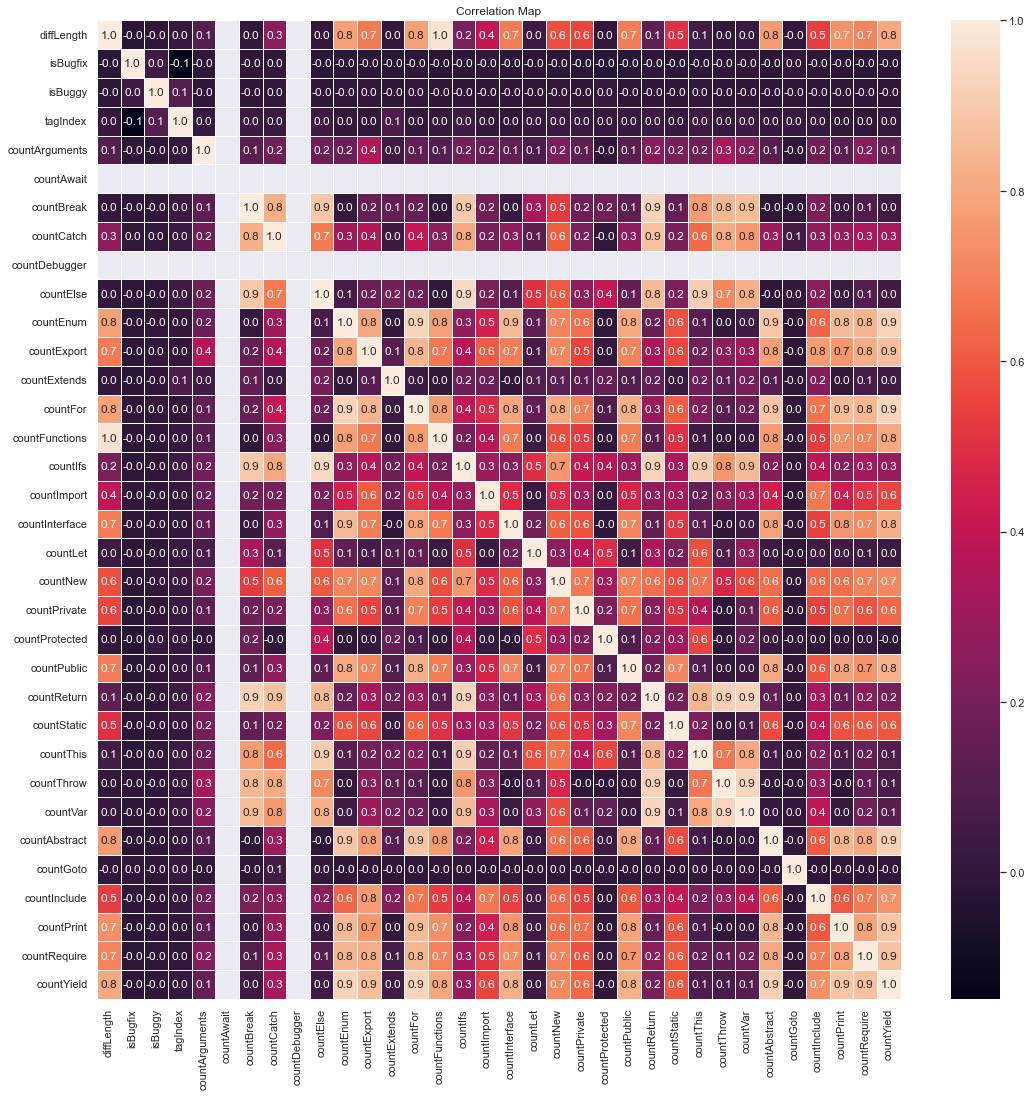

In [47]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(original_data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## Delete Features that correlate or are not relevant for the machine learning algorithm

In [48]:
original_data = original_data.drop(labels="countCatch", axis=1)
original_data = original_data.drop(labels="countDebugger", axis=1)
original_data = original_data.drop(labels="countAwait", axis=1)
original_data = original_data.drop(labels="countElse", axis=1)
original_data = original_data.drop(labels="countFor", axis=1)
original_data = original_data.drop(labels="countFunctions", axis=1)
original_data = original_data.drop(labels="countIfs", axis=1)
original_data = original_data.drop(labels="countInterface", axis=1)
original_data = original_data.drop(labels="countReturn", axis=1)
original_data = original_data.drop(labels="countThis", axis=1)
original_data = original_data.drop(labels="countVar", axis=1)
original_data = original_data.drop(labels="countAbstract", axis=1)
original_data = original_data.drop(labels="countGoto", axis=1)
original_data = original_data.drop(labels="countPrint", axis=1)
original_data = original_data.drop(labels="countRequire", axis=1)
original_data = original_data.drop(labels="countYield", axis=1)

original_data = original_data.drop(labels="commit", axis=1)
original_data = original_data.drop(labels="author", axis=1)
original_data = original_data.drop(labels="date", axis=1)
original_data = original_data.drop(labels="message", axis=1)
original_data = original_data.drop(labels="tagIndex", axis=1)

original_data = original_data.drop(labels="path", axis=1)
original_data = original_data.drop(labels="pathType", axis=1)

### check Correlation Map one more time

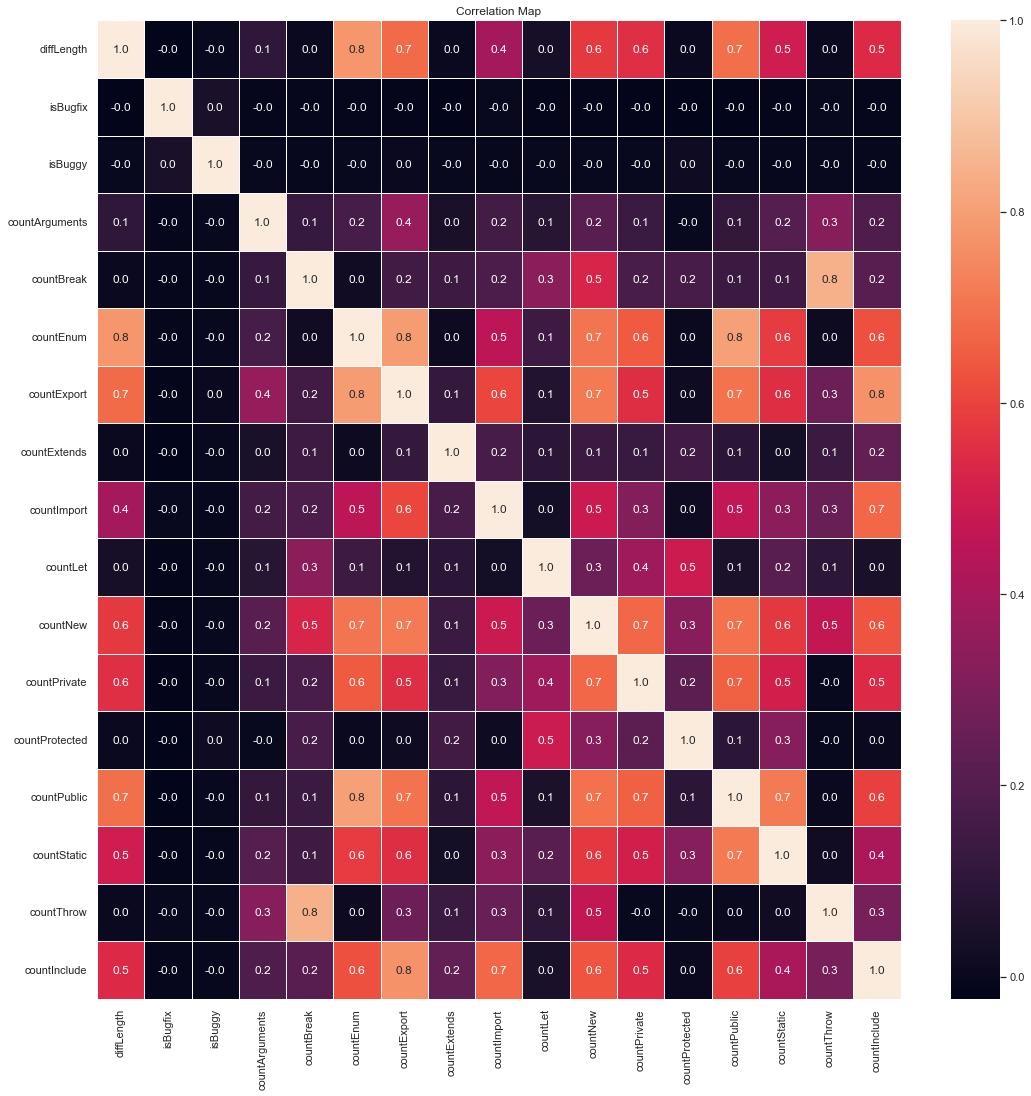

In [49]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(original_data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [50]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8725 entries, 0 to 8797
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diffLength      8725 non-null   float64
 1   isBugfix        8725 non-null   float64
 2   isBuggy         8725 non-null   int64  
 3   countArguments  8725 non-null   float64
 4   countBreak      8725 non-null   float64
 5   countEnum       8725 non-null   float64
 6   countExport     8725 non-null   float64
 7   countExtends    8725 non-null   float64
 8   countImport     8725 non-null   float64
 9   countLet        8725 non-null   float64
 10  countNew        8725 non-null   float64
 11  countPrivate    8725 non-null   float64
 12  countProtected  8725 non-null   float64
 13  countPublic     8725 non-null   float64
 14  countStatic     8725 non-null   float64
 15  countThrow      8725 non-null   float64
 16  countInclude    8725 non-null   float64
dtypes: float64(16), int64(1)
memory u

## perform Oversampling (Data is very unbalanced)

In [51]:
dataframe = original_data

In [52]:
max_size = dataframe['isBuggy'].value_counts().max()
lst = [dataframe]
for class_index, group in dataframe.groupby('isBuggy'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)

In [53]:
dataframe = frame_new

## Splt Trainings-, Test- and Validationdata

In [54]:
train, val, test = np.split(
    dataframe.sample(frac=1), [int(0.8 * len(dataframe)), int(0.9 * len(dataframe))]
)

print(f"{len(train)} train examples")
print(f"{len(val)} validation examples")
print(f"{len(test)} test examples")

13819 train examples
1727 validation examples
1728 test examples


## Create a Tensor

In [55]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop("isBuggy")
    df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [56]:
batch_size = 5
train_ds = df_to_dataset(train, shuffle=False, batch_size=batch_size)

/var/folders/wm/3khqb0fx169dg3z_5h89t2980000gn/T/ipykernel_94602/791710234.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}


In [57]:
[(train_features, label_batch)] = train_ds.take(1)
print(f"Every feature: {list(train_features.keys())}")
print(f'A batch of diffLength: {train_features["diffLength"]}')
print(f"A batch of targets {label_batch}")

Every feature: ['diffLength', 'isBugfix', 'isBuggy', 'countArguments', 'countBreak', 'countEnum', 'countExport', 'countExtends', 'countImport', 'countLet', 'countNew', 'countPrivate', 'countProtected', 'countPublic', 'countStatic', 'countThrow', 'countInclude']
A batch of diffLength: [[  796.]
 [11867.]
 [  683.]
 [ 1150.]
 [ 1091.]]
A batch of targets [1 1 0 0 0]


In [58]:
# check documentation for details:
# - https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for the feature.
    normalizer = layers.Normalization(axis=None)

    # Prepare a Dataset that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [59]:
diffLength_mean_col = train_features["diffLength"]
diffLength_mean_col

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[  796.],
       [11867.],
       [  683.],
       [ 1150.],
       [ 1091.]])>

In [60]:
layer = get_normalization_layer("diffLength", train_ds)
layer(diffLength_mean_col)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-0.0451242 ],
       [ 0.03112113],
       [-0.04590242],
       [-0.04268622],
       [-0.04309255]], dtype=float32)>

In [61]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/var/folders/wm/3khqb0fx169dg3z_5h89t2980000gn/T/ipykernel_94602/791710234.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}


In [62]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17274 entries, 0 to 467
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diffLength      17274 non-null  float64
 1   isBugfix        17274 non-null  float64
 2   isBuggy         17274 non-null  int64  
 3   countArguments  17274 non-null  float64
 4   countBreak      17274 non-null  float64
 5   countEnum       17274 non-null  float64
 6   countExport     17274 non-null  float64
 7   countExtends    17274 non-null  float64
 8   countImport     17274 non-null  float64
 9   countLet        17274 non-null  float64
 10  countNew        17274 non-null  float64
 11  countPrivate    17274 non-null  float64
 12  countProtected  17274 non-null  float64
 13  countPublic     17274 non-null  float64
 14  countStatic     17274 non-null  float64
 15  countThrow      17274 non-null  float64
 16  countInclude    17274 non-null  float64
dtypes: float64(16), int64(1)
memory u

In [63]:
# option 1: a suitable subset of predictors (e.g. predictors that are not correlated)
feature_columns1 = [
    "diffLength",
    "isBugfix",
    "countArguments",
    "countBreak",
    "countEnum",
    "countExport",
    "countExtends",
    "countImport",
    "countLet",
    "countNew",
    "countPrivate",
    "countProtected",
    "countPublic",
    "countStatic",
    "countThrow",
    "countInclude",
]


In [64]:
feature_columns = feature_columns1

In [65]:
all_inputs = []
encoded_features = []

# Numeric features.
for header in feature_columns:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [66]:
print(encoded_features)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_18')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_19')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_20')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_21')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_22')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_23')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_24')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_25')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_26')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_27')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_28')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalizatio

## Create, compile, and train the model

In [67]:
all_features = tf.keras.layers.concatenate(encoded_features)
x1 = tf.keras.layers.Dense(32, activation="relu")(all_features)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x1)
model = tf.keras.Model(all_inputs, output)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [68]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 diffLength (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 isBugfix (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 countArguments (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 countBreak (InputLayer)        [(None, 1)]          0           []                               
                                                                                            

In [69]:
history = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100


/Users/jonathanmaier/opt/anaconda3/envs/HHZ/lib/python3.8/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['isBuggy'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/Users/jonathanmaier/opt/anaconda3/envs/HHZ/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


216/216 [==============================] - 1s 3ms/step - loss: 0.6619 - accuracy: 0.6319 - val_loss: 0.6375 - val_accuracy: 0.6636
Epoch 2/100
216/216 [==============================] - 1s 2ms/step - loss: 0.6459 - accuracy: 0.6474 - val_loss: 0.6289 - val_accuracy: 0.6676
Epoch 3/100
216/216 [==============================] - 1s 3ms/step - loss: 0.6404 - accuracy: 0.6472 - val_loss: 0.6229 - val_accuracy: 0.6688
Epoch 4/100
216/216 [==============================] - 1s 2ms/step - loss: 0.6357 - accuracy: 0.6477 - val_loss: 0.6182 - val_accuracy: 0.6694
Epoch 5/100
216/216 [==============================] - 1s 2ms/step - loss: 0.6315 - accuracy: 0.6483 - val_loss: 0.6132 - val_accuracy: 0.6699
Epoch 6/100
216/216 [==============================] - 1s 2ms/step - loss: 0.6283 - accuracy: 0.6485 - val_loss: 0.6103 - val_accuracy: 0.6711
Epoch 7/100
216/216 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6488 - val_loss: 0.6070 - val_accuracy: 0.6705
Epoch 8/100

### print Training and Validation Accuracy for every Epcohe, to recognize potential Over- / Underfitting

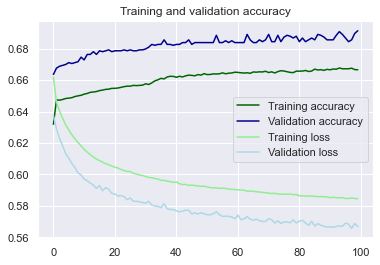

<Figure size 432x288 with 0 Axes>

In [70]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()

In [71]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

27/27 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6782
Accuracy 0.6782407164573669


In [72]:
y_pred = model.predict(test_ds)
predicted_categories = tf.round(y_pred)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories

<tf.Tensor: shape=(1728,), dtype=int64, numpy=array([1, 1, 0, ..., 0, 1, 1])>

In [73]:
# yields count of true negatives, false positives, false negatives, true positives
confusion_matrix(predicted_categories, true_categories)

array([[596, 277],
       [279, 576]])

In [74]:
# check that tp, fp, tn, fn are not confused
tn, fp, fn, tp = confusion_matrix(true_categories, predicted_categories).ravel()
print(tn, fp, fn, tp)

596 279 277 576


In [75]:
# yields class-specific precision, recall and f1-score
print(classification_report(true_categories, predicted_categories))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       875
           1       0.67      0.68      0.67       853

    accuracy                           0.68      1728
   macro avg       0.68      0.68      0.68      1728
weighted avg       0.68      0.68      0.68      1728



## create Confusion Matrix to Inspect Results

Text(0.5, 39.5, 'Predicted label')

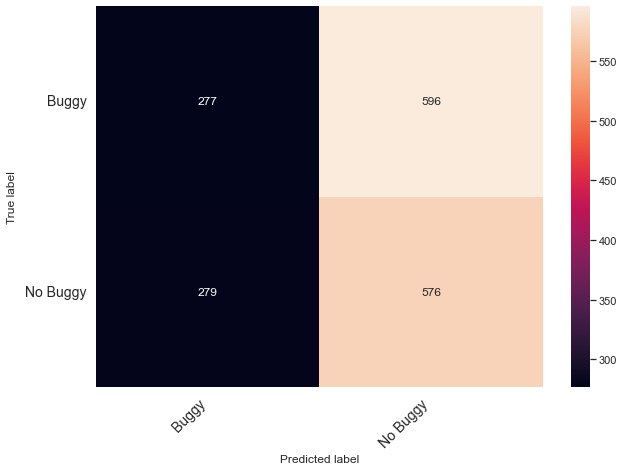

In [76]:
conf_mat = confusion_matrix(predicted_categories, true_categories)
conf_mat[0][0], conf_mat[0][1] = conf_mat[0][1], conf_mat[0][0]
df_cm = pd.DataFrame(
    conf_mat,
    index=["Buggy", " No Buggy"],
    columns=["Buggy", "No Buggy"],
)
fig = plt.figure(figsize=[10, 7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=14
)
plt.ylabel("True label")
plt.xlabel("Predicted label")